# Extracting Data

In [3]:
# Connect to your drive with the dataset folder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset tar extraction

import tarfile
from tqdm import tqdm # to visually inspect loops' evolution
import os

# set the paths of the tar dataset and the destination of the extracted dataset

"""
A .tar file is a container that gathers more files and folders together,
without compressing them.
"""

tar_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour.tar' # MODIFY AS NEEDED
extract_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour' # MODIFY AS NEEDED
# Ensure output directory exists
os.makedirs(extract_path, exist_ok=True)

# Open and extract with progress bar
with tarfile.open(tar_path) as tar:
    members = tar.getmembers() # extract all the components of the tar folder
    print(f"Extracting {len(members)} files to: {extract_path}")
    for member in tqdm(members, desc="Extracting", unit="file"):
        tar.extract(member, path=extract_path)

print("✅ Extraction complete.")

Extracting 1277 files to: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour


Extracting: 100%|██████████| 1277/1277 [01:57<00:00, 10.88file/s]

✅ Extraction complete.


In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour'  # MODIFY AS NEEDED

image_dir = f'{data_dir}/imagesTr'
label_dir = f'{data_dir}/labelsTr'

In [ ]:
# Function to delete unwanted files starting with '._'

def delete_dot_underscore_files(directory):
    for filename in os.listdir(directory):
        if filename.startswith('._'):
            file_path = os.path.join(directory, filename)
            os.remove(file_path)
            print(f"Deleted: {file_path}")

# Apply to both directories
delete_dot_underscore_files(image_dir)
delete_dot_underscore_files(label_dir)

Deleted: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/imagesTr/._BRATS_166.nii.gz
Deleted: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/imagesTr/._BRATS_115.nii.gz
Deleted: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/imagesTr/._BRATS_275.nii.gz
Deleted: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/imagesTr/._BRATS_027.nii.gz
Deleted: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/imagesTr/._BRATS_001.nii.gz
Deleted: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/imagesTr/._BRATS_004.nii.gz
Deleted: /content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/imagesTr/._BRATS_274.nii.gz
Deleted: /content/drive/MyDrive/Colab Notebooks/

# Loading functions

## from .nii.gz file

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

"""
What is a .nii.gz file?
.nii.gz stands for gzipped NIfTI file:
.nii = Neuroimaging Informatics Technology Initiative
.gz = compressed with gzip
It's a common format in medical imaging.
"""

# Define a function to load the image and label volumes from .nii.gz files
def load_volume(img_path, lbl_path):
    # Load the image data using nibabel and get the numpy array
    img = nib.load(img_path).get_fdata()   # Expected shape: (Height, Width, Depth, Modalities=4)
    # Load the label data using nibabel and get the numpy array
    lbl = nib.load(lbl_path).get_fdata()   # Expected shape: (Height, Width, Depth)
    # Convert the image data to float32 and the label data to uint8 for consistency
    return img.astype(np.float32), lbl.astype(np.uint8)



In [ ]:
# example

# Define the file paths for a sample image and its corresponding label
sample_image = f'{image_dir}/BRATS_001.nii.gz'
sample_label = f'{label_dir}/BRATS_001.nii.gz'

# Load the sample image and label using the defined function
x, y = load_volume(sample_image, sample_label)

# Print the shapes of the loaded image and label arrays
print("Image shape:", x.shape)
print("Label shape:", y.shape)

Image shape: (240, 240, 155, 4)
Label shape: (240, 240, 155)


## from .npy file

In [ ]:
import numpy as np

# Define a function to load the image and label volumes from .npy files
def load_volume_npy(img_path, lbl_path):
       img = np.load(img_path)
       lbl = np.load(lbl_path)
       return img.astype(np.float32), lbl.astype(np.uint8)

## loading function only for labels from .nii.gz file

In [ ]:
import numpy as np

def load_lbl(lbl_path):
       lbl = nib.load(lbl_path).get_fdata()
       return lbl.astype(np.uint8)

# Visualization functions

In [ ]:
import matplotlib.pyplot as plt

def show_4_mri_with_labels(volume, label):
  # Create figure for modalities
  plt.figure(figsize=(12, 4))

  # Loop through the 4 modalities
  for i in range(4):
      # Create subplot
      plt.subplot(1, 4, i+1)
      # Display middle slice of current modality
      plt.imshow(volume[..., volume.shape[2]//2, i], cmap='gray')
      """
      ...: all rows, all columns
      volume.shape[2] is the number of slices (DEPTH)
      volume.shape[2] // 2 takes the middle slice index
      i is the modality index (from 0 to 3)
      It's like saying: “Give me the 2D image for the center of the brain, for modality i.”
      The result is a 2D image of shape (H, W).
      """
      # Set modality title
      plt.title(f'Modality {i+1}')

  # Show modality plots
  plt.show()

  # Display middle slice of label
  plt.imshow(label[..., label.shape[2]//2], cmap='nipy_spectral')
  # Set label title
  plt.title('Label')

  # Show label plot
  plt.show()

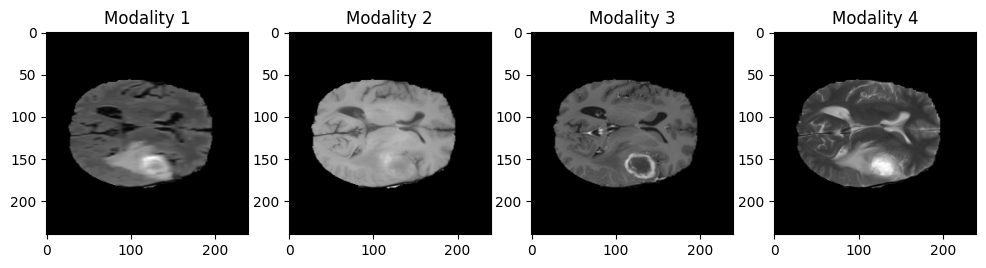

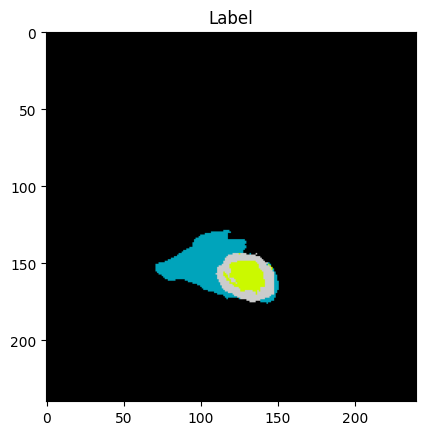

In [ ]:
# example
show_4_mri_with_labels(x, y)

In [ ]:
import matplotlib.pyplot as plt                  # For plotting
import ipywidgets as widgets                     # For interactive sliders in Jupyter
from IPython.display import display              # To display widgets in output cell

def show_mri_with_labels(volume, label, modality=0, axis=2, alpha=0.4):

    """
    Interactive visualization of MRI slices with segmentation labels.

    Parameters:
    - volume: 4D numpy array (H, W, D, modalities)
    - label: 3D numpy array (H, W, D) with segmentation labels
    - modality: index of the modality to visualize
    - axis: axis along which to slice (0, 1, or 2)
    - alpha: transparency level for label overlay
    """

    assert volume.shape[:3] == label.shape, "volume and label shape mismatch"
    max_idx = volume.shape[axis] - 1  # How many slices you can scroll through along the chosen axis

    def view_slice(i):

        # This function is called every time you move the slider.
        # Depending on the axis, it selects the correct 2D slice from the 3D volume and label:


        plt.figure(figsize=(6, 6))  # Set figure size

        # Extract the image and label slice based on selected axis
        if axis == 0:
            img = volume[i, :, :, modality]
            lbl = label[i, :, :]
        elif axis == 1:
            img = volume[:, i, :, modality]
            lbl = label[:, i, :]
        else:
            img = volume[:, :, i, modality]
            lbl = label[:, :, i]

        # Display grayscale image with label overlay
        plt.imshow(img, cmap='gray')
        plt.imshow(lbl, cmap='nipy_spectral', alpha=alpha)  # Overlay labels with transparency
        plt.axis('off')
        plt.title(f'Slice {i} — Modality {modality}')
        plt.show()

    # Create an interactive slider to scroll through slices
    slider = widgets.IntSlider(min=0, max=max_idx, step=1, value=max_idx // 2)
    display(widgets.interact(view_slice, i=slider))  # Link slider to view_slice function

In [ ]:
# example:
show_mri_with_labels(x, y, modality=0, axis=2)  # Visualize modality 0 along the axial axis

interactive(children=(IntSlider(value=77, description='i', max=154), Output()), _dom_classes=('widget-interact…

<function __main__.show_mri_with_labels.<locals>.view_slice(i)>

# Data Exploration

In [ ]:
# Ai fini della presentazione ampliare questa parte con visualizzazioni, spiegazioni sulla dimensionalità del dataset, sulle diverse tipologie di risonanze magnetiche...

In [ ]:
# Looking for the unique labels

label_files = [f for f in os.listdir(label_dir) if f.endswith('.nii.gz')]

labels={}

for lbl in tqdm(label_files,
                unit="file",
                total=len(label_files)):
  current_label_path = f'{label_dir}/{lbl}'
  lbl_loaded = load_lbl(current_label_path)
  unique_labels = np.unique(lbl_loaded)
  for elem in unique_labels:
    if elem in labels:
      labels[elem]+=1
    else:
      labels[elem]=1

print("✅ Label counting complete.")
print(labels)

100%|██████████| 484/484 [02:56<00:00,  2.75file/s]

✅ Label counting complete.
{np.uint8(0): 484, np.uint8(1): 484, np.uint8(2): 484, np.uint8(3): 472}


In [ ]:
# based on chatGpt the four labels stand for:

# 0: Everything that is not tumor: background or brain
# 1: Non-Enhancing Tumor
# 2: Edema
# 3: Enhancing Tumor

In [ ]:
# OSS:
# the imbalance problem is related to the single image because voxels related to tumor are lesser than the ones related to brain.
# It is not something related to the entire dataset

In [ ]:
# an example to show this: let's consider a generic 3D volume with labels and let's count the occurrences of each label:

lbl_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/Task01_BrainTumour/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz'
lbl_loaded = load_lbl(lbl_path)

labels, counts = np.unique(lbl_loaded, return_counts=True)
for i in labels:
  print(f"Label: {labels[i]}, Count: {counts[i]}")

Label: 0, Count: 8816276
Label: 1, Count: 53050
Label: 2, Count: 27189
Label: 3, Count: 31485


# Following Matlab Guide

In [ ]:
# QUI INIZIA LA MIA PARTE DOVE RICOPIO LA GUIDA MATLAB https://www.mathworks.com/help/images/segment-3d-brain-tumor-using-deep-learning.html

# ci sono due strade:
# 1) la prima è quella di usare una U-net pretrained (dopo averla importata può avere senso usarla come confronto con la rete costruita da noi: valutarla quindi sugli stessi dati),
# 2) la seconda è quella di costruire "a mano" una U-net ed allenarla direttamente sul dataset

## Strada 1

In [ ]:
# la strada 1 non è al momento percorribile: indagare...

In [ ]:
# rained3DUnetURL = "https://www.mathworks.com/supportfiles/vision/data/  brainTumorSegmentation3DUnet_v2.zip";
# downloadTrainedNetwork(trained3DUnetURL,dataDir);
# load(fullfile(dataDir,"brainTumorSegmentation3DUnet_v2.mat"));

E' un codice MATLAB che Scarica un file .zip contenente un file .mat che contiene una rete U-Net 3D già addestrata.  

❌ IL PROBLEMA IN PYTHON
Python non può usare direttamente il file .mat come modello.

❓ QUINDI COSA POSSO FARE DAVVERO?
Hai 2 opzioni realistiche:

✅ Opzione A)  
Ricreare la stessa rete, studi l'architettura del file .mat (se riesci a estrarre le info).  
Ricrei in Python una U-Net 3D con la stessa struttura.  
Carichi i tuoi dati e la addestri da zero, oppure cerca se MathWorks ha pubblicato i pesi in formato ONNX / PyTorch (spoiler: probabilmente no).

✅ Opzione B)  
Usare un modello preaddestrato simile in Python, come una U-Net 3D già pronta per BraTS da GitHub o HuggingFace (HuggingFace BraTS models)

## Strada 2

## Preprocess Data
To train the 3-D U-Net network more efficiently, preprocess the MRI data by using the preprocessBraTSDataset helper function (che non è disponibile sul sito ma devo ricrearla a mano).   
The helper function performs these operations:

1) Crop the data to a region containing the brain and tumor. Cropping reduces the size of data while retaining the most critical part of each MRI volume and its corresponding labels.  

2) Normalize each modality of each volume independently by subtracting the mean and dividing by the standard deviation of the cropped brain region.

3) Split the 484 training volumes into 400 training, 29 validation, and 55 test sets. The test volumes do not have labels, so this example does not use the test data.

In [ ]:
# libraries
import os
import numpy as np
import nibabel as nib
import shutil # operations on files
from sklearn.model_selection import train_test_split
from skimage.measure import label, regionprops

In [ ]:
# 1) Cropping function

"""
Crop the data to a region containing the brain and tumor.
Cropping reduces the size of data while retaining the most critical part of each MRI volume and its corresponding labels.
"""

def cropping(volume):
    mask = volume.sum(axis=3) > 0
    # mask is a 3D volume of coordinates (h,w,d) where each voxel has a boolean value (true, false).
    # True: if the sum of the values of the voxels along the 4 representations (at the fixed: h,w,d) is positive, False: otherwise
    # useful in detecting the relevant area vs the black background
    labeled = label(mask)
    # labeled is still a 3D volume of coordinates (h,w,d) but here the value assigned to each voxel is an integer number (starting from 0)
    # where each number represents a group of connected voxels (0 is the background). Adiacent voxels share the same number.
    props = regionprops(labeled)
    # it extracts geometric properties of the found regions

    if len(props) == 0:
        return volume, (slice(None), slice(None), slice(None))
        # in case the image was all black background, return the image without any cropping

    bbox = props[0].bbox  # The bounding box of the first region[0] (supposing it is always the brain) (min_z, min_y, min_x, max_z, max_y, max_x)

    slices = tuple(slice(bbox[i], bbox[i+3]) for i in range(3))
    return volume[slices[0], slices[1], slices[2], :].astype(np.float32), slices # it returns a tuple with the sliced volume and slices information, that can be applied also to the label


In [ ]:
# example

x_cropped, slices = cropping(x)
y_cropped = y[slices[0], slices[1], slices[2]] # label
show_mri_with_labels(x_cropped, y_cropped, modality=0, axis=2)

interactive(children=(IntSlider(value=65, description='i', max=131), Output()), _dom_classes=('widget-interact…

<function __main__.show_mri_with_labels.<locals>.view_slice(i)>

In [ ]:
# 2) Normalization function

"""
Normalize each modality of each volume INDEPENDENTLY (I'm not looking for global statistics on train set)
by subtracting the mean and dividing by the standard deviation of the cropped brain region.
"""

def normalize_volume(volume):
    norm_vol = np.zeros_like(volume)
    for i in range(volume.shape[-1]): # loop through the 4 magnetic resonances
        brain_region = volume[..., i] [volume[..., i] > 0] # brain_region is a 3D volume whose voxels (in the i-th channel) are all > 0: related to the brain. It avoids considering background to do normalization
        if brain_region.size == 0:
            norm_vol[..., i] = volume[..., i]  # if all background: return the original volume
        else:
            mean = brain_region.mean()
            std = brain_region.std()
            norm_vol[..., i] = (volume[..., i] - mean) / (std + 1e-5)
    return norm_vol

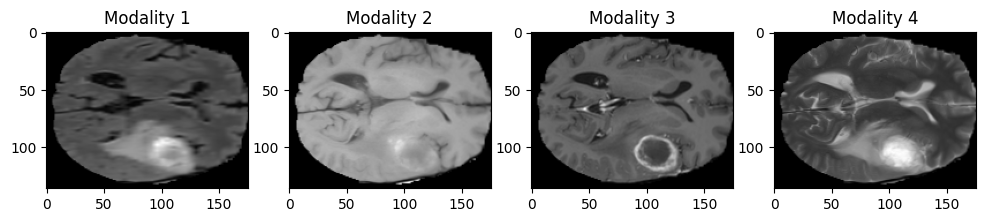

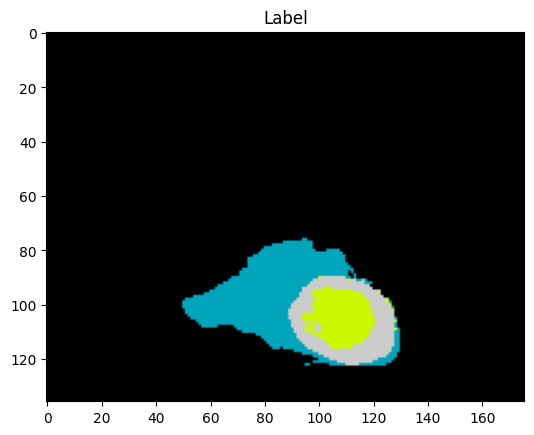

In [ ]:
# example: normalization after cropping
x_normalized = normalize_volume(x_cropped)
show_4_mri_with_labels(x_normalized, y_cropped)

# oss: it doesn't make sense to normalize labels: they are discrete values related to the four categories:
# absence, edema, enhancing, and non-enhancing tumor (da capire in che ordine e che numero è assegnato a cosa).

In [ ]:
# Application of Cropping and Normalization
# (per ora faccio iterare solo pochi giri altrimenti finisco la memoria sul drive: una soluzione al problema potrebbe essere cancellare le immagini di train e i labels una volta preProcessati)

from tqdm import tqdm

"""
OSS.
Qui applico cropping e normalization su tutti i dati, si potrebbe discutere del fatto che la normalizzazione potrebbe essere fatta solo sui dati di train, per poi raccogliere le statistiche globali,
e poi applicare al test, non come qui che sto normalizzando paziente per paziente. Comunque finora mi attengo alla guida che fa così
"""

image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.nii.gz')]) # a list with all the sorted images (starting from _001)
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.nii.gz')]) # a list with all the sorted labels (starting from _001)

assert len(image_files) == len(label_files), "Number of images and labels should be the same"

# needed folder
image_processed_dir = os.path.join(data_dir, "preProcessedimagesTr")
lbl_processed_dir = os.path.join(data_dir, "preProcessedlabelsTr" )
os.makedirs(image_processed_dir, exist_ok=True)
os.makedirs(lbl_processed_dir, exist_ok=True)

preprocessed_id = []  # list of elements (base_name), useful in the future to split the data

for i, (current_img, current_lbl) in tqdm(enumerate(zip(image_files[479:], label_files[479:])), # enumerate returns: the index of the i-th tuple, the tuple: (current_img, current_lbl), starting from the 480-th
                                          total=len(image_files) - 479,
                                          desc="Preprocessing images and labels",
                                          unit="pair"):

    img_path = os.path.join(image_dir, current_img)
    lbl_path = os.path.join(label_dir, current_lbl)

    # Load image and label
    img, lbl = load_volume(img_path, lbl_path)

    # Crop
    img_cropped, slices = cropping(img)
    lbl_cropped = lbl[slices[0], slices[1], slices[2]]

    # Normalization
    img_norm = normalize_volume(img_cropped)

    # Extract base name (without extensions .nii.gz)
    base_name_brain = os.path.splitext(os.path.splitext(current_img)[0])[0]  # ex: "._BRATS_001"
    base_name_lbl = os.path.splitext(os.path.splitext(current_lbl)[0])[0]  # ex: "BRATS_001"

    # Path of .npy files to be saved
    img_save_path = os.path.join(image_processed_dir, f"{base_name_brain}_Processedimage.npy")
    lbl_save_path = os.path.join(lbl_processed_dir, f"{base_name_lbl}_Processedlabel.npy")

    # Saving
    np.save(img_save_path, img_norm)
    np.save(lbl_save_path, lbl_cropped)

    # Saving base names to keep trace
    preprocessed_id.append(base_name_brain)

print("✅ Preprocessing complete.")

Preprocessing images and labels: 100%|██████████| 5/5 [00:13<00:00,  2.69s/pair]

✅ Preprocessing complete.


Image shape: (131, 172, 146, 4)
Label shape: (131, 172, 146)


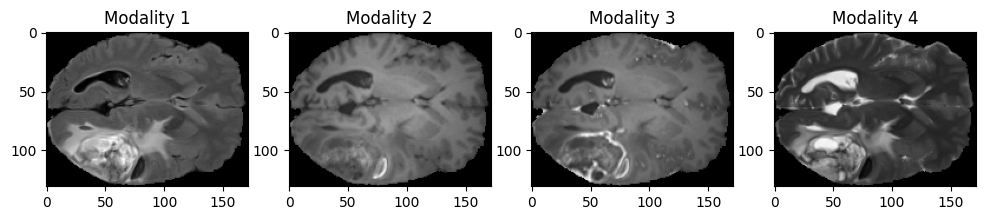

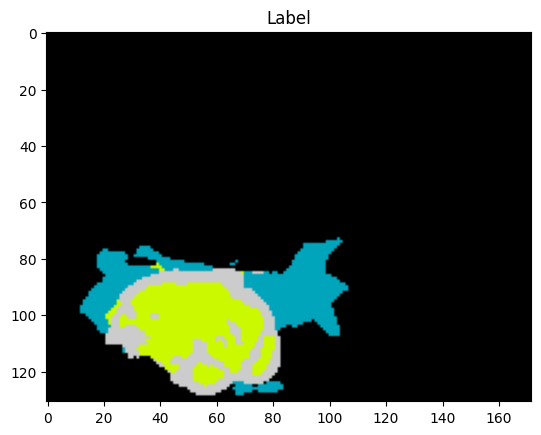

In [ ]:
# example:

# Define the file paths for a sample image and its corresponding label
sample_image = f'{image_processed_dir}/BRATS_480_Processedimage.npy'
sample_label = f'{lbl_processed_dir}/BRATS_480_Processedlabel.npy'
# Load the sample image and label using the defined function
x_ex, y_ex = load_volume_npy(sample_image, sample_label)
# Print the shapes of the loaded image and label arrays
print("Image shape:", x_ex.shape)
print("Label shape:", y_ex.shape)

show_4_mri_with_labels(x_ex, y_ex)

In [ ]:
# 3) Split into train, validation, test

# Shuffle the list to randomize the order before splitting
import random
random.seed(42)  # For reproducibility
random.shuffle(preprocessed_id)

# Split sizes
train_size = 400
val_size = 29
test_size = 55

# assert train_size + val_size + test_size == len(preprocessed_id), "Split sizes do not match total data"

# Split the data
train_id = preprocessed_id[:train_size]
val_id = preprocessed_id[train_size:train_size + val_size]
test_id = preprocessed_id[train_size + val_size:]

# oss: the output train_pairs, val_pairs and test_pairs are simply vectors whose elements are the final part of the path of each image

# Questa ultima parte qui sotto è ancora una bozza e devo rivederla in funzione della rete che hai costruito tu

### Create Random Patch Extraction Datastore for Training and Validation

One challenge of medical image segmentation is the amount of memory needed to store and process 3-D volumes.  
Training a network and performing segmentation on the full input volume is impractical due to GPU resource constraints.  
This example solves the problem by dividing the image into smaller patches, or blocks, for training and segmentation.

In [ ]:
# Create a function that extracts random patches (smaller 3D volume) from images and their corresponding pixel label data.
# Specify a patch size of 132-by-132-by-132 voxels. (QUESTO VALORE ANDRA' MODIFICATO E TESTATO IN BASE ALLE NOSTRE VARIE ESIGENZE: PER ORA RIMANIAMO SU QUELLO CONISIGLIATO)
# From EACH pair of volumes and labels, 16 (anche questo si può modificare) randomly patches are extracted.
# Each batch of a given epoch is made of 4 couples of patches (image and labels), before updating weights.

# esempio:
# Supponiamo tu abbia 100 volumi nel dataset di training.
# patchPerImage = 16;
# allora per ogni epoca, estrai 16 patch casuali da ciascuno dei 100 volumi.
# Totale patch per epoca = 100 × 16 = 1600 patch
# patchdsTrain.MiniBatchSize = 4 significa che:
# L’addestramento avverrà su batch da 4 patch alla volta, quindi ci saranno 1600 / 4 = 400 batch per epoca

In [ ]:
# in realtà questa classe non è esattamente quello che serve, potrebbe già essere automatica nel caso di Leo, vedere bene il suo codice

import numpy as np
import tensorflow as tf
import random
import os

class Patch3DGenerator(tf.keras.utils.Sequence): # parent: tf.keras.utils.Sequence, it permits to use this class with model.fit()

    def __init__(self, image_paths, label_paths, patch_size=(132, 132, 132), patches_per_image=16, batch_size=4, shuffle=True):

        self.image_paths = image_paths # list of paths to .npy files (DEVO CREARE UNA LISTA CON TUTTI I PATH ALLE PREPROCESSED IMAGES DA DARE IN PASTO ALLA CLASS !!!)
        self.label_paths = label_paths # list of paths to .npy files
        self.patch_size = patch_size
        self.patches_per_image = patches_per_image
        self.batch_size = batch_size
        self.shuffle = shuffle # after each epoch, I shuffle the order of images
        self.num_images = len(image_paths)
        self.total_patches = self.num_images * self.patches_per_image
        self.on_epoch_end()

    def __len__(self):
        # Number of total batches per epoch
        return self.total_patches // self.batch_size

    def on_epoch_end(self): # called at the end of each epoch
        self.patch_coords = [] # A list with tuples (img_idx, x, y, z) for each patch to be generated, which image to use: img_idx, where to begin the patch: (x, y, z)

        img_indices = list(range(self.num_images)) # a list with images indexes [0, 1, ..., N-1], dove N = numbers of volumes.
        if self.shuffle:
            random.shuffle(img_indices)

        for img_idx in img_indices:
            img, lbl = load_volume_npy(self.image_paths[img_idx], self.label_paths[img_idx])  # momentary loading to get dimensions
            D, H, W, _ = img.shape

            for _ in range(self.patches_per_image):
                x = random.randint(0, D - self.patch_size[0])
                y = random.randint(0, H - self.patch_size[1])
                z = random.randint(0, W - self.patch_size[2])
                self.patch_coords.append((img_idx, x, y, z))
                # For each image, I generate the starting coordinates (x,y,z) of every pattern,
                # these coordinates are saved in the 'patch_coords' vector

        if self.shuffle:
            random.shuffle(self.patch_coords)

    # at the end of on_epoch_end, I have the vector 'self.patch_coords' of dimensions len(image_paths) * patches_per_image (100*16),
    # each element is a tuple ((img_idx, x, y, z))


    def __getitem__(self, index):
        start = index * self.batch_size
        end = start + self.batch_size
        batch_coords = self.patch_coords[start:end]
        # Estrae da self.patch_coords il blocco di coordinate per costruire questo batch.
        # Esempio: se batch_size = 4 e index = 2, allora: start = 2 * 4 = 8, end = 12, batch_coords = self.patch_coords[8:12], le quattro patches da inserire nel batch
        # il problema è che nel training vorrei questa operazione partisse dal primo elemento di patch_coords e venisse ripetuta a gruppi di piccoli batch per tutta la epoch ->
        # come automatizzo questa cosa ???

        X_batch = []
        Y_batch = []
        # Vectors with 'batch_size' elements, patches (little 3D volumes) of images and labels

        for img_idx, x, y, z in batch_coords:
            img, lbl = load_volume_npy(self.image_paths[img_idx], self.label_paths[img_idx])

            x_end = x + self.patch_size[0]
            y_end = y + self.patch_size[1]
            z_end = z + self.patch_size[2]

            img_patch = img[x:x_end, y:y_end, z:z_end, :]
            lbl_patch = lbl[x:x_end, y:y_end, z:z_end]

            X_batch.append(img_patch)
            Y_batch.append(lbl_patch)

        return np.array(X_batch), np.array(Y_batch)

In [ ]:
# Come usarlo:

train_generator = Patch3DGenerator(
    image_paths=train_image_paths,
    label_paths=train_label_paths,
    patch_size=(132, 132, 132),
    patches_per_image=16,
    batch_size=4
)

# Per il training:
model.fit(train_generator, epochs=20)


📌 Note:
Le immagini dovrebbero avere shape (H, W, D, C) dove C=4 (modalità).

Le etichette invece sono (H, W, D) e verranno eventualmente one-hot encoded in fase di preprocessing o con SparseCategoricalCrossentropy.

Se la tua memoria è limitata, puoi ridurre patches_per_image o lavorare con multiprocessing=False.

Se vuoi posso aiutarti anche con il generatore per la validazione, con augmentation 3D, o con il bilanciamento del dataset (es. ignorare patch completamente background). Fammi sapere!








